In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
#checking training data for missing values
train_data.isnull().sum()

In [ ]:
#missing values found in the age, cabin and embarked columns

In [2]:
#dropping missing values from training data
train_data = train_data.dropna()

In [ ]:
# train_data.isnull().sum()

In [3]:
#encoding sex column
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded_sex = encoder.fit_transform(train_data.iloc[:,4])
train_data['Sex'] = encoded_sex

In [4]:
train_x = train_data.iloc[:, [2,4,5,6,7,9]].values
train_y = train_data.iloc[:, 1].values

In [5]:
#splitting data into train and cross-validation
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(train_x, train_y, test_size = 0.25, random_state = 0)

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train,y_train)

In [ ]:
cv_pred = clf.predict(x_cv)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_cv, cv_pred)
cm

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score:' , accuracy_score(y_cv, cv_pred))

In [ ]:
#Logistic Regression gives an accuracy score of 80% on the held out cross validation set

In [ ]:
#applying decision tree 
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)

In [ ]:
cv_tree_predict = tree.predict(x_cv)

In [ ]:
from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(y_cv, cv_tree_predict)
cm2

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score:' , accuracy_score(y_cv, cv_tree_predict))

In [ ]:
#decision tree gave a lower accuracy compared to logistic regression
#trees tend to get over fitted
#applying random forest to prevent over fitting can

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
forest.fit(x_train, y_train)

In [ ]:
cv_forest_pred = forest.predict(x_cv)

In [ ]:
from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(y_cv, cv_forest_pred)
cm3

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy score:' , accuracy_score(y_cv, cv_forest_pred))

In [ ]:
#84.7% accuracy on fitting random forest with 100 random trees obtained

Performing PCA to reduce dimension

In [6]:
from sklearn.decomposition import PCA

In [9]:
titanic_PCA_components = PCA(n_components = 4)
titanic_PCA_components.fit(train_x)
test = titanic_PCA_components.transform(train_x)

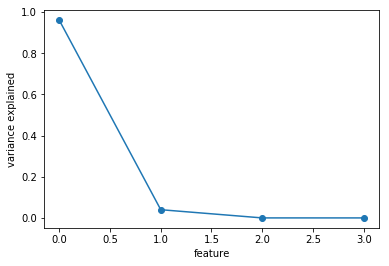

In [10]:
plt.plot(list(titanic_PCA_components.explained_variance_ratio_), '-o')
plt.xlabel('feature')
plt.ylabel('variance explained')
plt.show()